## Observations and Insights 

# Observations and Insights

1. Not all drugs had the same amount of observations over the same amount of time.  I would like to continue with the data collection to get a richer data set to really analize the drugs to each other to find the best treatments (example is Capomulin had 230 test vs Propriva that had only 161.

2. I would like for more metrics within the test.  I would like a better definition of the "Timepoint" of the test.  I noticed that the Age and Weight didn't changes over the "Timepoint" for the Mouse ID's that I looked at during my analysis.  Some items that I would like to know would be:

    - Did the weight change with the differet drugs?
    - Did age have a difference on the different drugs?
    - What side effects did the drugs have?
    - How did the side effect differ from the different treatments?
    
I am sure there are a number of other metrics I would want to know to fully understand the total study and the safety of each of the drugs.

3. A deeper analysis of each of the drug would be needed.  I would want to know more on the correlation and regression of each of the drugs.  I would want to get a full understanding of outliers in the study.  Know which drugs have the most outliers outside of the IQR.  Again, a better understanding of side effects and saftey along with a more robust study (more observations) to fully accept a drug(s) going forward to treatment.

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_df = pd.merge(mouse_metadata, study_results, how="inner", on="Mouse ID") 

# Display the data table for preview
combined_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [4]:
combined_df.count()

Mouse ID              1893
Drug Regimen          1893
Sex                   1893
Age_months            1893
Weight (g)            1893
Timepoint             1893
Tumor Volume (mm3)    1893
Metastatic Sites      1893
dtype: int64

In [5]:
# Checking the number of mice.
count_of_mice = combined_df["Mouse ID"].count()
count_of_mice

1893

In [6]:
# Checking the Unique number of mice
mice_group = combined_df.groupby('Mouse ID')
mouse_count = mice_group['Mouse ID'].count()
mouse_count

Mouse ID
a203    10
a251    10
a262    10
a275    10
a366     7
        ..
z435     3
z578    10
z581    10
z795    10
z969    10
Name: Mouse ID, Length: 249, dtype: int64

In [10]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_id = combined_df[combined_df.duplicated(['Mouse ID', 'Timepoint'])]
duplicate_id

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [11]:
# Optional: Get all the data for the duplicate mouse ID. 
dup_mouse_id = combined_df[combined_df.duplicated('Mouse ID')]
dup_mouse_id


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [12]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
updated_df = combined_df.drop_duplicates('Mouse ID')
updated_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.0,0
10,s185,Capomulin,Female,3,17,0,45.0,0
20,x401,Capomulin,Female,16,15,0,45.0,0
30,m601,Capomulin,Male,22,17,0,45.0,0
40,g791,Ramicane,Male,11,16,0,45.0,0
...,...,...,...,...,...,...,...,...
1858,z314,Stelasyn,Female,21,28,0,45.0,0
1860,z435,Propriva,Female,12,26,0,45.0,0
1863,z581,Infubinol,Female,24,25,0,45.0,0
1873,z795,Naftisol,Female,13,29,0,45.0,0


In [13]:
# Checking the number of mice in the clean DataFrame.
mice_group_val = updated_df.groupby('Mouse ID')
mice_count_val = mice_group_val['Mouse ID'].count()
mice_count_val

Mouse ID
a203    1
a251    1
a262    1
a275    1
a366    1
       ..
z435    1
z578    1
z581    1
z795    1
z969    1
Name: Mouse ID, Length: 249, dtype: int64

## Summary Statistics

In [14]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

tumor_volume = combined_df.groupby(['Drug Regimen'])

mean_tv = tumor_volume['Tumor Volume (mm3)'].mean()
mean_tv

median_tv = tumor_volume['Tumor Volume (mm3)'].median()
median_tv

var_tv = tumor_volume['Tumor Volume (mm3)'].var()
var_tv

std_tv = tumor_volume['Tumor Volume (mm3)'].std()
std_tv

sem_tv = tumor_volume['Tumor Volume (mm3)'].sem()
sem_tv

#check to see if summary dataframe is working -- confirmed that summary dataframe is working
summary_tv = pd.DataFrame({'Mean': mean_tv,
                          'Median': median_tv})
summary_tv

#finalize summary dataframe
summary_tv = pd.DataFrame({'Mean': mean_tv,
                          'Median': median_tv,
                          'Variance': var_tv,
                          'Standard Deviation': std_tv,
                          'SEM': sem_tv})
summary_tv

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [15]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line

tot_mean_tv = combined_df['Tumor Volume (mm3)'].mean()
tot_mean_tv

tot_median_tv = combined_df['Tumor Volume (mm3)'].median()
tot_median_tv

tot_var_tv = combined_df['Tumor Volume (mm3)'].var()
tot_var_tv

tot_std_tv = combined_df['Tumor Volume (mm3)'].std()
tot_std_tv

tot_sem_tv = combined_df['Tumor Volume (mm3)'].sem()
tot_sem_tv

#check to see if summary dataframe is working -- look to pandas homework on the format(use [] for the index)
tot_summary_tv = pd.DataFrame({'Mean': [tot_mean_tv]})
tot_summary_tv

#check to see if summary dataframe is working -- look to pandas homework on the format(use [] for the index)
tot_summary_tv = pd.DataFrame({'Mean': [tot_mean_tv], 
                               'Median': [tot_median_tv],
                              'Variance': [tot_var_tv],
                              'Standard Deviation': [tot_std_tv],
                              'SEM': [tot_sem_tv]})
tot_summary_tv

,Mean,Median,Variance,Standard Deviation,SEM
0,50.448381,48.951474,79.116074,8.894722,0.204436


## Bar and Pie Charts

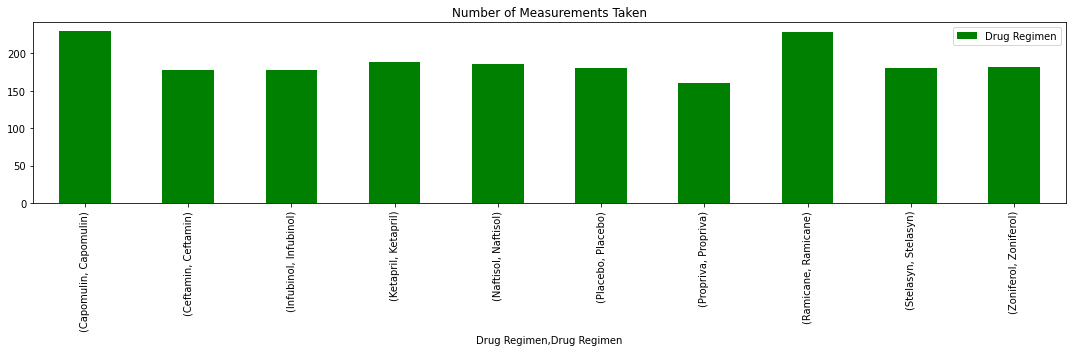

In [16]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
#groupby 'Drug Regimen' to get a count of the measurments before plotting
dr_df = combined_df.groupby('Drug Regimen')
dr_count = dr_df['Drug Regimen'].value_counts()
dr_count

dr_count_chart = dr_count.plot(kind='bar', figsize=(15,5), legend='upperright', 
                               title=('Number of Measurements Taken'), color='green')
plt.tight_layout()

In [17]:
names = combined_df['Drug Regimen'].unique()
names

array(['Ramicane', 'Capomulin', 'Infubinol', 'Placebo', 'Ceftamin',
       'Stelasyn', 'Zoniferol', 'Ketapril', 'Propriva', 'Naftisol'],
      dtype=object)

In [18]:
count_of_dr = combined_df['Drug Regimen'].value_counts()
count_of_dr

Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Placebo      181
Stelasyn     181
Ceftamin     178
Infubinol    178
Propriva     161
Name: Drug Regimen, dtype: int64

<Figure size 1440x1440 with 0 Axes>

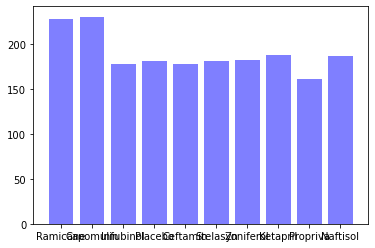

<Figure size 1440x1440 with 0 Axes>

In [159]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
#import dependencies
import numpy as np

dr_names = ["Ramicane", "Capomulin", "Infubinol", "Placebo", "Ceftamin", "Stelasyn", "Zoniferol", "Ketapril", "Propriva", "Naftisol"]
tot_meas = [228, 230, 178, 181, 178, 181, 182, 188, 161, 186]
x_axis = np.arange(len(tot_meas))

plt.bar(x_axis, tot_meas, color='b', alpha=0.5, align="center")

# Create the ticks for our bar chart's x axis
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, dr_names)
plt.figure(figsize=(20,20))
           
# plt.title("Number of Measurements Taken")
# plt.xlabel('Drug Regimen')
# plt.ylabel("Amount")



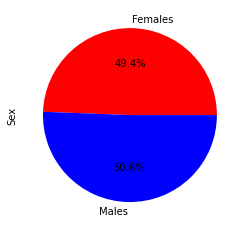

In [20]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
sex_df = combined_df.groupby('Sex')
sex_count = sex_df['Sex'].value_counts()
sex_count

labels = ["Females", "Males"]
colors = ["red", "blue"]

sex_count_chart = sex_count.plot(kind='pie', labels=labels, colors = colors, autopct="%1.1f%%")

In [21]:
sex_df = combined_df.groupby('Sex')
sex_count = sex_df['Sex'].value_counts()
sex_count

Sex     Sex   
Female  Female    935
Male    Male      958
Name: Sex, dtype: int64

(-1.1756979042636164,
 1.1282937402085897,
 -1.1918349098573184,
 1.1259794268614327)

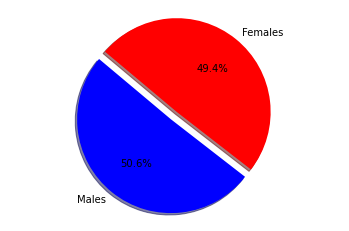

In [22]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
# Labels for the sections of our pie chart
labels = ["Males", "Females"]
sizes = [958, 935]

#assign colors and explode males
colors = ["blue", "red"]
explode = (0.1, 0)

# Automatically finds the percentages of each part of the pie chart
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

plt.axis("equal")

## Quartiles, Outliers and Boxplots

In [23]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Filter the 4 treatments above
cric_df = combined_df[(combined_df["Drug Regimen"] == "Capomulin") | (combined_df["Drug Regimen"] == "Ramicane") | (combined_df["Drug Regimen"] == "Infubinol") | (combined_df["Drug Regimen"] == "Ceftamin")]
cric_df

# Start by getting the last (greatest) timepoint for each mouse
# Filter in high to low
cric_df = cric_df.sort_values("Timepoint", ascending=False)
cric_df

# Drop Duplicates Mouse ID's after filtering Timepoint in decending order
cric_df = cric_df.drop_duplicates(subset="Mouse ID", keep='first')
cric_df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
1872,z581,Infubinol,Female,24,25,45,62.754451,3
800,e476,Infubinol,Male,23,26,45,62.435404,1
154,c758,Ramicane,Male,9,17,45,33.397653,1
440,i557,Capomulin,Female,1,24,45,47.685963,1
144,m957,Capomulin,Female,3,19,45,33.329098,1
...,...,...,...,...,...,...,...,...
1205,m756,Infubinol,Male,19,30,5,47.010364,1
1743,x226,Ceftamin,Male,23,28,0,45.000000,0
594,b447,Ceftamin,Male,2,30,0,45.000000,0
1551,t573,Ceftamin,Female,15,27,0,45.000000,0


In [24]:
# Put treatments into a list for for loop (and later for plot labels)
#treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
#tumor_vol = []

capo = cric_df.loc[cric_df['Drug Regimen'] == 'Capomulin']
capo
    

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
440,i557,Capomulin,Female,1,24,45,47.685963,1
144,m957,Capomulin,Female,3,19,45,33.329098,1
134,r554,Capomulin,Female,8,17,45,32.377357,3
124,y793,Capomulin,Male,17,17,45,31.896238,2
104,u364,Capomulin,Male,18,17,45,31.023923,3
164,t565,Capomulin,Female,20,17,45,34.455298,0
244,g288,Capomulin,Male,3,19,45,37.074024,1
282,l897,Capomulin,Male,17,19,45,38.846876,1
299,b742,Capomulin,Male,7,21,45,38.939633,0
224,w914,Capomulin,Male,24,21,45,36.041047,2


The lower quartile of Tumor Volume (mm3) is: 32.37735684
The upper quartile of Tumor Volume (mm3) is: 40.1592203
The interquartile range of Tumor Volume (mm3) is: 7.781863460000004
The the median of Tumor Volume (mm3) is: 38.125164399999996 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.


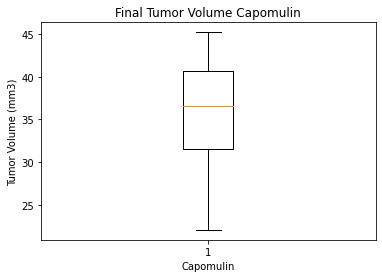

In [166]:
# Capomulin

capo = cric_df.loc[cric_df['Drug Regimen'] == 'Capomulin']
capo = capo['Tumor Volume (mm3)']
capo

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
quartiles = capo.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

# Print the Quartiles, Lower, Upper and IQR
print(f"The lower quartile of Tumor Volume (mm3) is: {lowerq}")
print(f"The upper quartile of Tumor Volume (mm3) is: {upperq}")
print(f"The interquartile range of Tumor Volume (mm3) is: {iqr}")
print(f"The the median of Tumor Volume (mm3) is: {quartiles[0.5]} ")

# Print the Upper and Lower Bounds
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

# Box Plot for Ramicane
fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Volume Capomulin')
ax1.set_xlabel('Capomulin')
ax1.set_ylabel('Tumor Volume (mm3)')
ax1.boxplot(rami)
plt.show()

The lower quartile of Tumor Volume (mm3) is: 31.56046955
The upper quartile of Tumor Volume (mm3) is: 40.65900627
The interquartile range of Tumor Volume (mm3) is: 9.098536719999998
The the median of Tumor Volume (mm3) is: 36.56165229 
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.


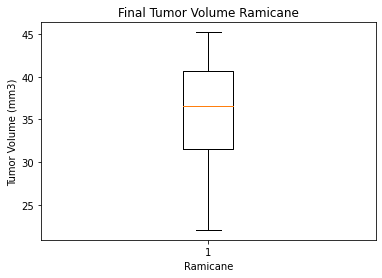

In [165]:
# Ramicane

rami = cric_df.loc[cric_df['Drug Regimen'] == 'Ramicane']
rami = rami['Tumor Volume (mm3)']
rami

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
quartiles = rami.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

# Print the Quartiles, Lower, Upper and IQR
print(f"The lower quartile of Tumor Volume (mm3) is: {lowerq}")
print(f"The upper quartile of Tumor Volume (mm3) is: {upperq}")
print(f"The interquartile range of Tumor Volume (mm3) is: {iqr}")
print(f"The the median of Tumor Volume (mm3) is: {quartiles[0.5]} ")

# Print the Upper and Lower Bounds
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

# Box Plot for Ramicane
fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Volume Ramicane')
ax1.set_xlabel('Ramicane')
ax1.set_ylabel('Tumor Volume (mm3)')
ax1.boxplot(rami)
plt.show()


The lower quartile of Tumor Volume (mm3) is: 54.04860769
The upper quartile of Tumor Volume (mm3) is: 65.52574285
The interquartile range of Tumor Volume (mm3) is: 11.477135160000003
The the median of Tumor Volume (mm3) is: 60.16518046 
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.


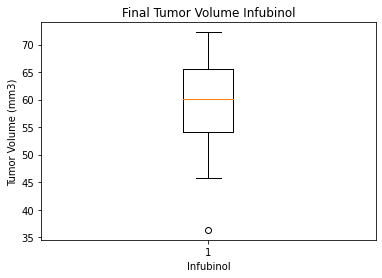

In [164]:
# Infubinol

infu = cric_df.loc[cric_df['Drug Regimen'] == 'Infubinol']
infu = infu['Tumor Volume (mm3)']
infu

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
quartiles = infu.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

# Print the Quartiles, Lower, Upper and IQR
print(f"The lower quartile of Tumor Volume (mm3) is: {lowerq}")
print(f"The upper quartile of Tumor Volume (mm3) is: {upperq}")
print(f"The interquartile range of Tumor Volume (mm3) is: {iqr}")
print(f"The the median of Tumor Volume (mm3) is: {quartiles[0.5]} ")

# Print the Upper and Lower Bounds
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

# Box Plot for Infubinol
fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Volume Infubinol')
ax1.set_xlabel('Infubinol')
ax1.set_ylabel('Tumor Volume (mm3)')
ax1.boxplot(infu)
plt.show()

The lower quartile of Tumor Volume (mm3) is: 48.72207785
The upper quartile of Tumor Volume (mm3) is: 64.29983003
The interquartile range of Tumor Volume (mm3) is: 15.577752179999997
The the median of Tumor Volume (mm3) is: 59.85195552 
Values below 25.355449580000002 could be outliers.
Values above 87.66645829999999 could be outliers.


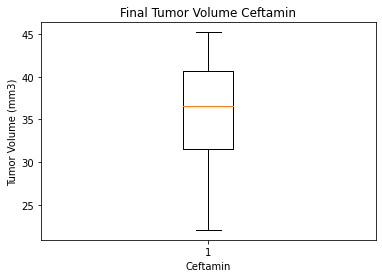

In [161]:
# Ceftamin

ceft = cric_df.loc[cric_df['Drug Regimen'] == 'Ceftamin']
ceft = ceft['Tumor Volume (mm3)']
ceft

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
quartiles = ceft.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

# Print the Quartiles, Lower, Upper and IQR
print(f"The lower quartile of Tumor Volume (mm3) is: {lowerq}")
print(f"The upper quartile of Tumor Volume (mm3) is: {upperq}")
print(f"The interquartile range of Tumor Volume (mm3) is: {iqr}")
print(f"The the median of Tumor Volume (mm3) is: {quartiles[0.5]} ")

# Print the Upper and Lower Bounds
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

# Box Plot for Ceftamin
fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Volume Ceftamin')
ax1.set_xlabel('Ceftamin')
ax1.set_ylabel('Tumor Volume (mm3)')
ax1.boxplot(rami)
plt.show()

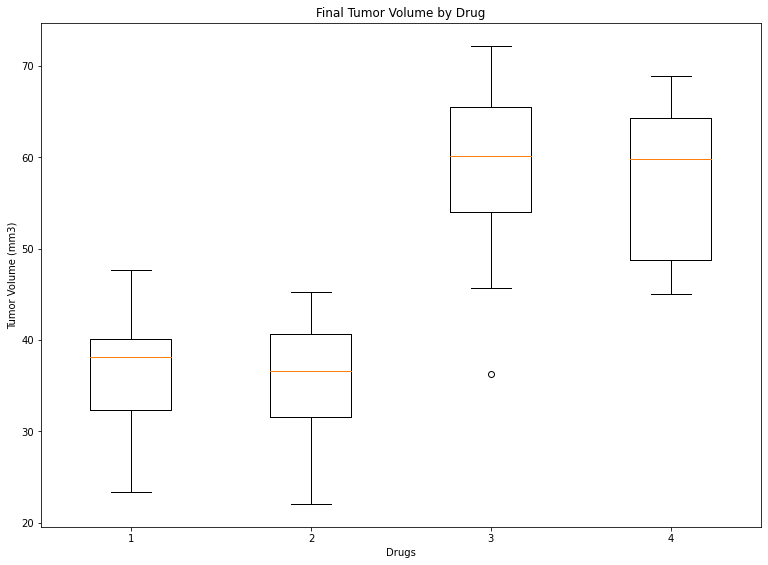

In [163]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

Capomulin = capo
Ramicane = rami
Infubinol = infu
Ceftamin = ceft
 
Drugs = [capo, rami, infu, ceft]

fig = plt.figure(figsize = (10,7))

# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])
  
# Creating plot
bp = ax.boxplot(Drugs)
  
# show plot
plt.title('Final Tumor Volume by Drug')
plt.xlabel('Drugs')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

# fig1, ax1 = plt.subplots()
# ax1.set_title('')
# ax1.set_ylabel('')
# ax1.boxplot(Regimen)
# plt.show()


## Line and Scatter Plots

Text(0, 0.5, 'Tumor Volume (mm3)')

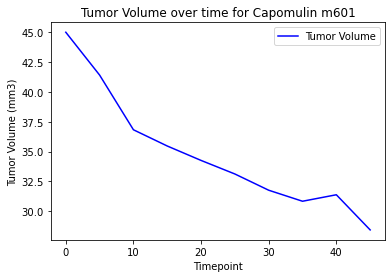

In [83]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

# Create a Capomulin data frame
capomulin_df = combined_df.loc[combined_df['Drug Regimen'] == 'Capomulin']
capomulin_df

# Create a data frame for a single mouse
capo_mouse = capomulin_df.loc[capomulin_df['Mouse ID'] == 'm601']
capo_mouse

# Create the X and Y axis lists
time = np.arange(0, 50, 5)
tumor_vol = [45.000000, 41.408591, 36.825367, 35.464612, 34.255732, 33.118756, 31.758275, 30.834357, 31.378045, 28.430964]

# Plot the charts and apply some styling
volumes, = plt.plot(time, tumor_vol, color="b", label="Tumor Volume")

# Create a legend, title, x label and y label
plt.legend(loc="best")
plt.title('Tumor Volume over time for Capomulin m601')
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')



Text(0.5, 1.0, 'Average Tumor Volume vs Mouse Weight')

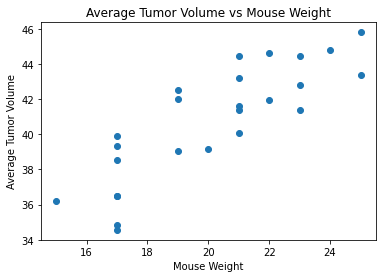

In [140]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
# Look at the data for reference
capomulin_df.head()

# Find the Average Tumor Vol for Capomulin by mouse
avg_tumor_vol = capomulin_df.groupby(capomulin_df['Mouse ID'])['Tumor Volume (mm3)'].mean()
avg_tumor_vol

# Fine the Average Weight for Capomulin by mouse
mouse_weight = capomulin_df.groupby(capomulin_df['Mouse ID'])['Weight (g)'].mean()
mouse_weight

plt.scatter(mouse_weight, avg_tumor_vol)
plt.xlabel('Mouse Weight')
plt.ylabel('Average Tumor Volume')
plt.title('Average Tumor Volume vs Mouse Weight')

## Correlation and Regression

The correlation between mouse weight and average tumor volume is 0.84
The r-squared is: 0.7088568047708717


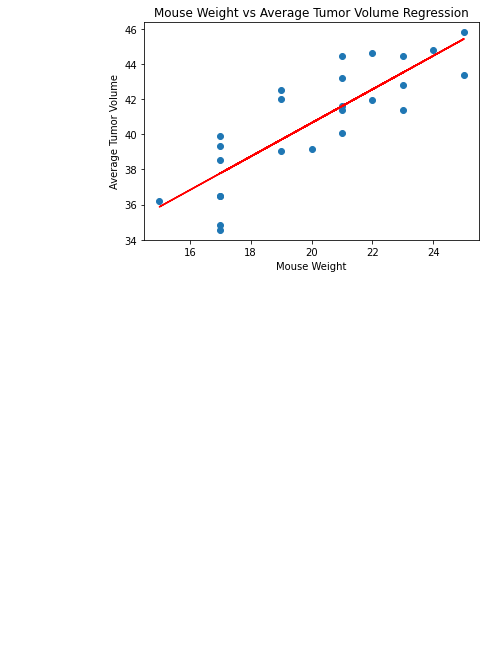

In [160]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

# Import scipy.stats for linear regression and numpy
from scipy.stats import linregress
import numpy as np

# Find the Average Tumor Vol for Capomulin by mouse
avg_tumor_vol = capomulin_df.groupby(capomulin_df['Mouse ID'])['Tumor Volume (mm3)'].mean()
avg_tumor_vol

# Fine the Average Weight for Capomulin by mouse
mouse_weight = capomulin_df.groupby(capomulin_df['Mouse ID'])['Weight (g)'].mean()
mouse_weight

# Find the Correlation using st.pearsonr for Mouse Weight and Average Tumor Volume
correlation = st.pearsonr(mouse_weight, avg_tumor_vol)
print(f'The correlation between mouse weight and average tumor volume is {round(correlation[0],2)}')

# Assign the x and y values from mouse_weight and avg_tumor_vol
x_values = mouse_weight
y_values = avg_tumor_vol

# Bring in the Regression code
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,10),fontsize=15,color="red")

# Label the x and y axis
plt.xlabel('Mouse Weight')
plt.ylabel('Average Tumor Volume')
plt.title('Mouse Weight vs Average Tumor Volume Regression')
print(f"The r-squared is: {rvalue**2}")
plt.show()
